In [56]:
import shap
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [57]:
df = pd.read_csv('table.csv')
# replace C with 1 and P with 0
df['Label'] = df['Label'].replace({'C': 1, 'P': 0})
df

C:\Users\user\AppData\Local\Temp\ipykernel_13268\3825214023.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace({'C': 1, 'P': 0})


,mean_value_ML,mean_value_AP,mean_distance_ML,mean_distance_AP,mean_distance_Radius,maximal_distance_ML,maximal_distance_AP,maximal_distance_Radius,rms_ML,rms_AP,...,critical_displacement_Diffusion_ML,short_time_scaling_Diffusion_ML,long_time_scaling_Diffusion_ML,short_time_diffusion_Diffusion_AP,long_time_diffusion_Diffusion_AP,critical_time_Diffusion_AP,critical_displacement_Diffusion_AP,short_time_scaling_Diffusion_AP,long_time_scaling_Diffusion_AP,Label
0,0.046123,-1.461512,0.385651,0.543167,0.730730,1.990957,3.392738,3.563114,0.486396,0.713827,...,0.387522,0.827853,0.010303,1.509905,0.919846,0.731532,0.927016,0.780243,-0.012418,1
1,0.042500,-0.365777,0.532939,0.484075,0.806206,2.655908,1.882897,2.862772,0.692067,0.611752,...,0.941689,0.824806,-0.005626,1.397278,0.788905,0.703945,0.789882,0.812403,-0.001764,1
2,0.496358,-1.401023,0.364302,0.400104,0.606724,2.190242,1.755362,2.219504,0.481193,0.506953,...,0.279504,0.827185,0.073962,0.812678,0.352416,0.580691,0.334341,0.817032,0.048434,1
3,0.314393,-0.549541,0.573516,0.486970,0.825558,2.559821,1.802601,2.829481,0.721078,0.599380,...,1.037714,0.858537,0.000290,1.850512,0.334793,0.331613,0.268558,0.874330,0.099857,1
4,1.412529,0.186249,0.929037,1.094830,1.599270,3.859579,4.202153,4.317307,1.164596,1.377935,...,2.303989,0.840059,0.028184,9.677386,2.811869,0.427816,2.631170,0.766941,0.039114,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2.605348,-2.030942,0.335179,0.524191,0.686425,1.416125,1.702970,1.717904,0.431635,0.636464,...,0.110204,0.766259,0.180948,0.727823,0.475327,0.743096,0.452061,0.801942,0.084507,0
101,0.776783,1.222163,0.541288,0.659628,0.945852,2.025473,2.542295,2.836388,0.673406,0.851786,...,0.568117,0.893255,0.055320,1.647572,0.497987,0.426641,0.359597,0.893434,0.191116,0
102,-0.708497,-0.800798,0.466417,0.711986,0.933087,2.423353,3.586807,3.600080,0.606632,0.907559,...,0.650107,0.825616,0.015828,1.722177,0.926328,0.612255,0.859127,0.708744,0.076754,0
103,0.268076,-1.346882,0.930665,0.949494,1.448217,4.199459,3.079528,4.447592,1.158516,1.114526,...,1.823896,0.869994,0.095945,1.884861,0.719936,0.464423,0.507631,0.855230,0.227788,0


In [58]:
X = df.drop(['Label'], axis=1)
y = df['Label']

Results for split 1
Accuracy: 0.8095
Precision: 0.8889
Recall: 0.7273
F1 Score: 0.8000


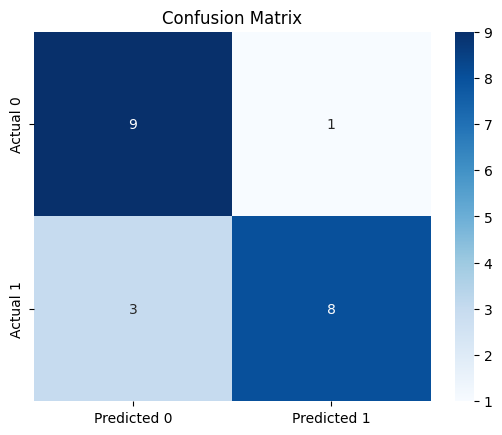

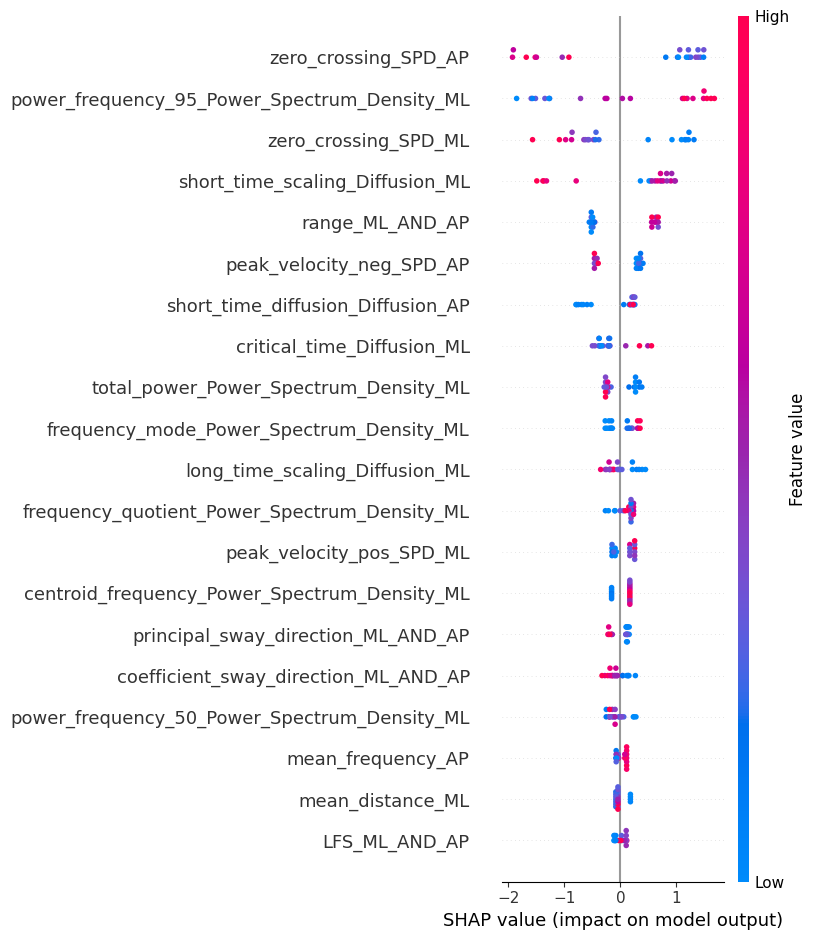

Results for split 2
Accuracy: 0.7619
Precision: 0.7500
Recall: 0.8182
F1 Score: 0.7826


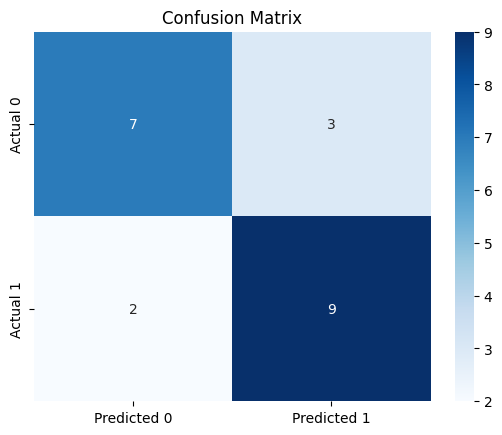

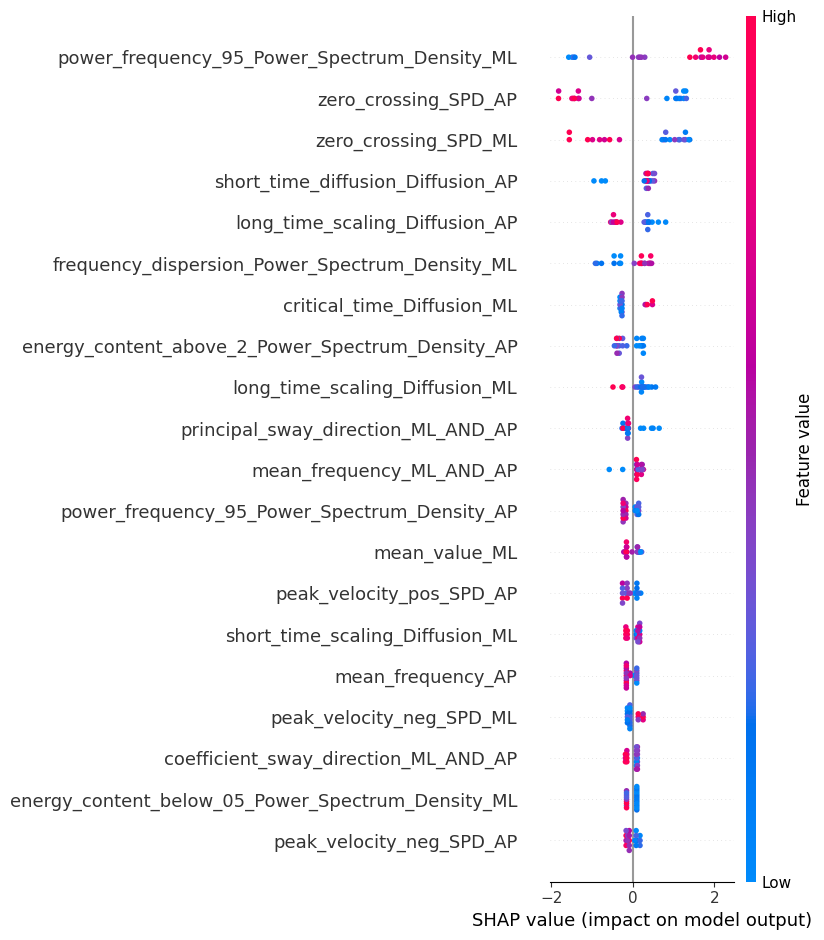

Results for split 3
Accuracy: 0.7619
Precision: 0.7500
Recall: 0.8182
F1 Score: 0.7826


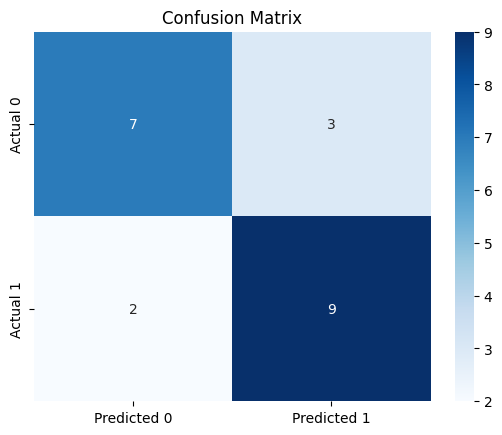

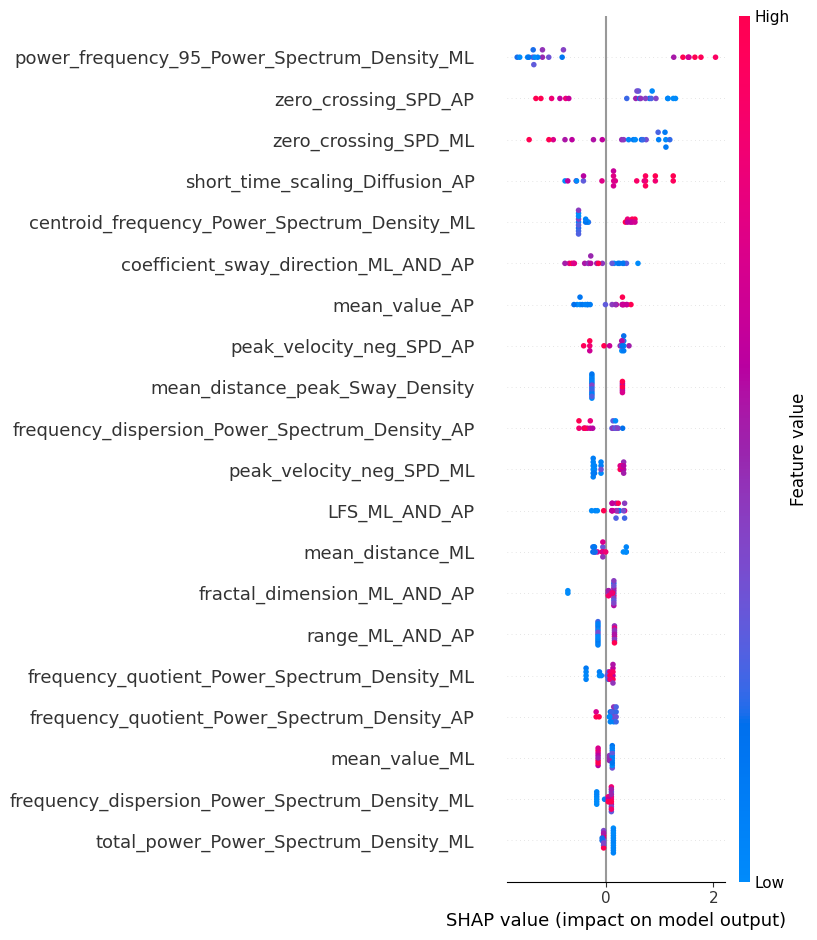

Results for split 4
Accuracy: 0.7619
Precision: 0.8000
Recall: 0.7273
F1 Score: 0.7619


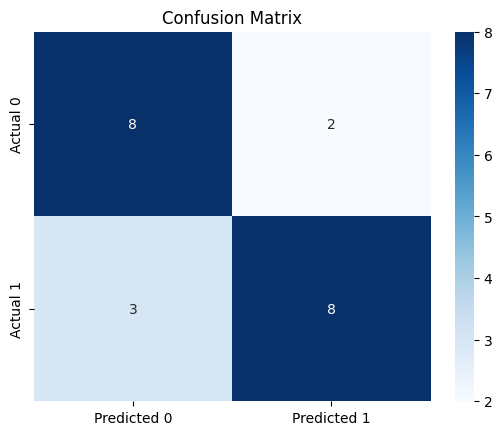

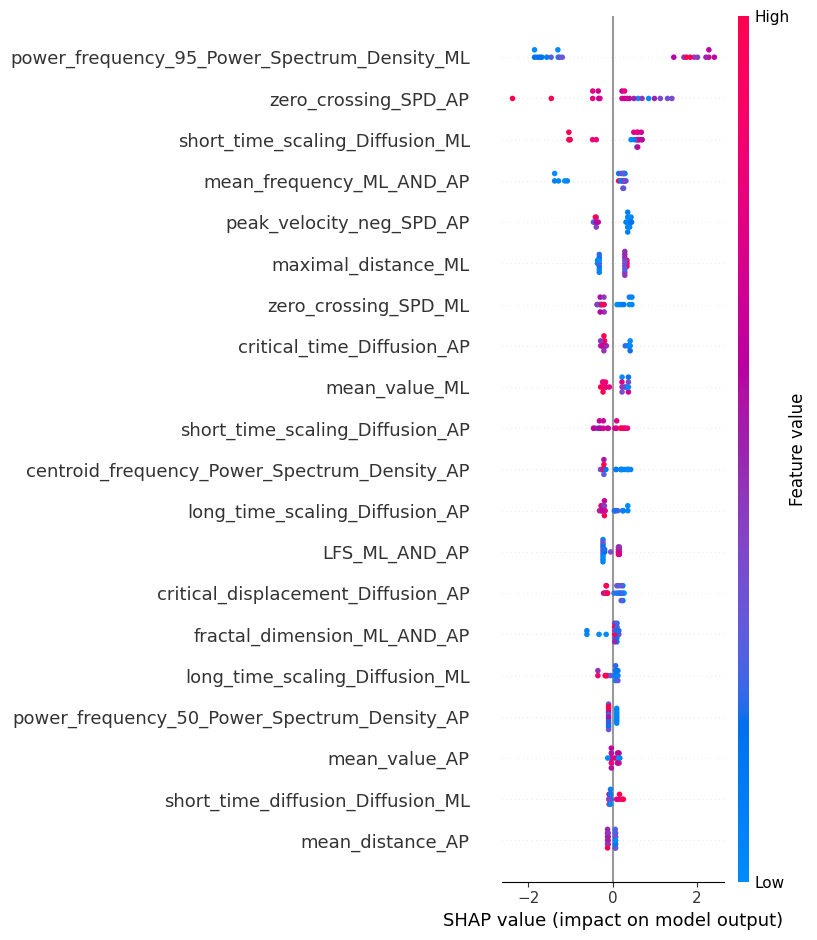

Results for split 5
Accuracy: 0.8571
Precision: 0.9000
Recall: 0.8182
F1 Score: 0.8571


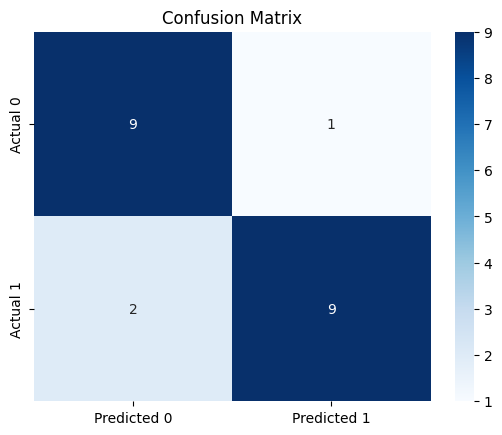

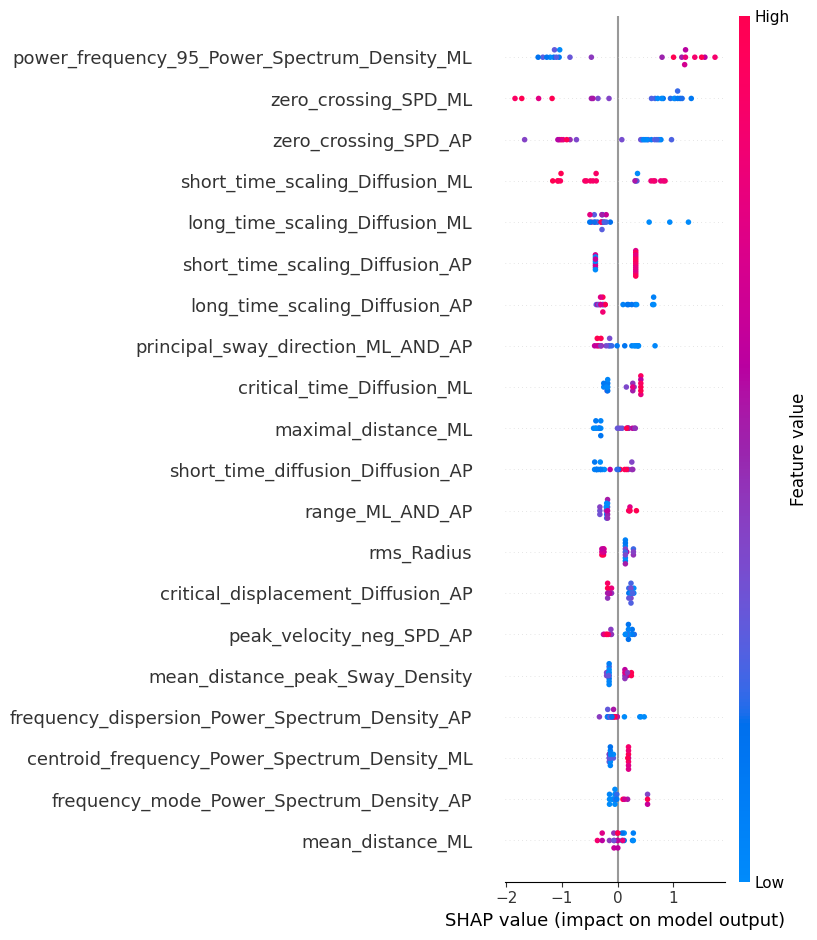

In [59]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    print(f'Results for split {i+1}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf = XGBClassifier(eval_metric='logloss', random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    precision = precision_score(y_test, y_pred)
    print(f'Precision: {precision:.4f}')

    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall:.4f}')

    f1 = f1_score(y_test, y_pred)
    print(f'F1 Score: {f1:.4f}')

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.show()

    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X_test)

    shap.summary_plot(shap_values, X_test)